Deseasonalize and normalize

Current working directory: /Users/leyixu/Desktop/Nowcast/data


100%|██████████| 84/84 [00:00<00:00, 1254.67it/s]

            China: Financial Institutions: Total Deposits Balance: RMB:PoP GROWTHRATE  \
date                                                                                    
1992-03-31                                                NaN                           
1992-04-30                                                NaN                           
1992-05-31                                                NaN                           
1992-06-30                                                NaN                           
1992-07-31                                                NaN                           
1992-08-31                                                NaN                           
1992-09-30                                          -0.993356                           
1992-10-31                                           0.972389                           
1992-11-30                                          -0.409996                           
1992-12-31           

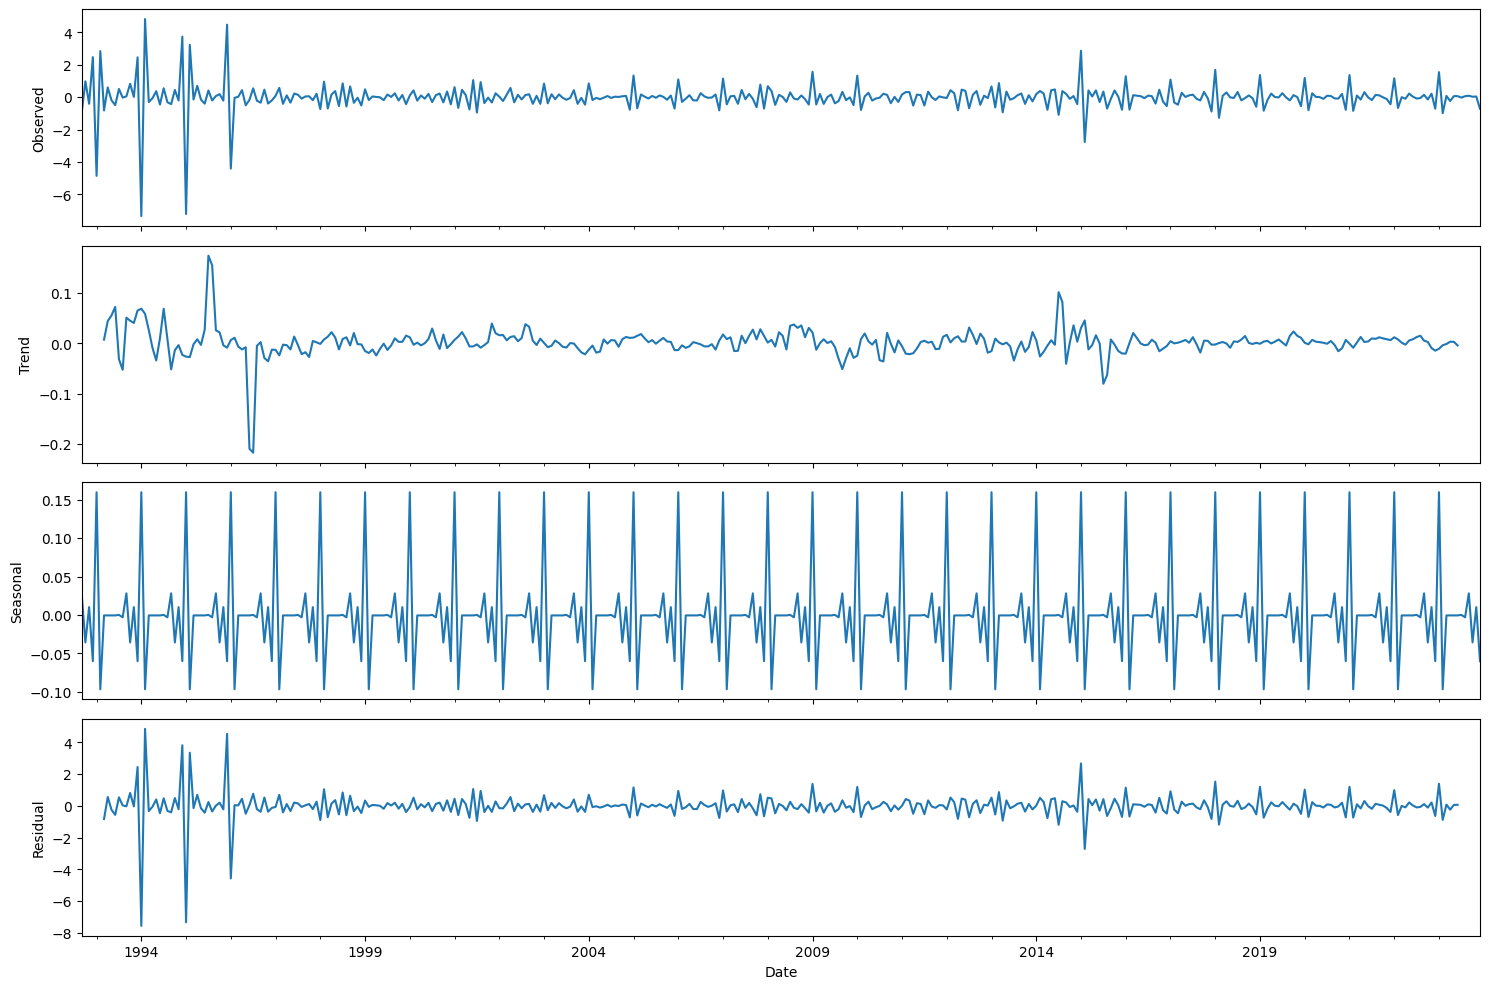

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm
from pathlib import Path
import os

# Get the root directory of the current project
project_dir = Path().resolve()

# Print the current working directory to confirm
print(f"Current working directory: {project_dir}")

# Read data
metadata = pd.read_csv(project_dir / "data_files" / "processed_data" / "meta_monthly_blocks.csv")
data = pd.read_csv(project_dir / "data_files" / "processed_data" / "em_imputed_mq_stationary.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date').sort_index()

# Function to deseasonalize a single column
def deseasonalize(series):
    # Ensure the series has a datetime index
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    
    # Keep track of original NaN positions
    nan_mask = series.isna()
    
    # Interpolate NaNs temporarily for decomposition
    interpolated_series = series.interpolate().ffill().bfill()
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(interpolated_series, model='additive', period=12)
    
    # Combine trend and residual for deseasonalized series
    deseasonalized = decomposition.trend + decomposition.resid
    
    # Restore NaNs to their original positions
    deseasonalized[nan_mask] = np.nan
    
    return deseasonalized

# Function to standardize a single column
def z_score(x):
    return (x - x.mean()) / x.std()

# Normalize and deseasonalize the data
normalized_deseasonalized_data = data.copy()
for column in tqdm(normalized_deseasonalized_data.columns):
    if column != 'date':
        # Normalize
        normalized_series = z_score(normalized_deseasonalized_data[column])
        # Deseasonalize
        normalized_deseasonalized_data[column] = deseasonalize(normalized_series)

# Store the original data for later use if needed
original_data = data.copy()

# Use the deseasonalized data for further analysis
data = normalized_deseasonalized_data

# Check the first few rows of each series to ensure they're not all the same
print(data.head(10))

# Visualize the decomposition of a sample column
sample_column = data.columns[0]  # Change this to the column you want to visualize
decomposition = seasonal_decompose(data[sample_column].dropna(), model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Save the deseasonalized data for later use
data.to_csv(project_dir / "data_files" / "processed_data" / "deseasonalized_data.csv", index=False)

Current working directory: /Users/leyixu/Desktop/Nowcast/data


100%|██████████| 84/84 [00:00<00:00, 973.78it/s]

            China: Financial Institutions: Total Deposits Balance: RMB:PoP GROWTHRATE  \
date                                                                                    
1992-03-31                                                NaN                           
1992-04-30                                                NaN                           
1992-05-31                                                NaN                           
1992-06-30                                                NaN                           
1992-07-31                                                NaN                           
1992-08-31                                                NaN                           
1992-09-30                                          -0.993356                           
1992-10-31                                           0.972389                           
1992-11-30                                          -0.409996                           
1992-12-31           

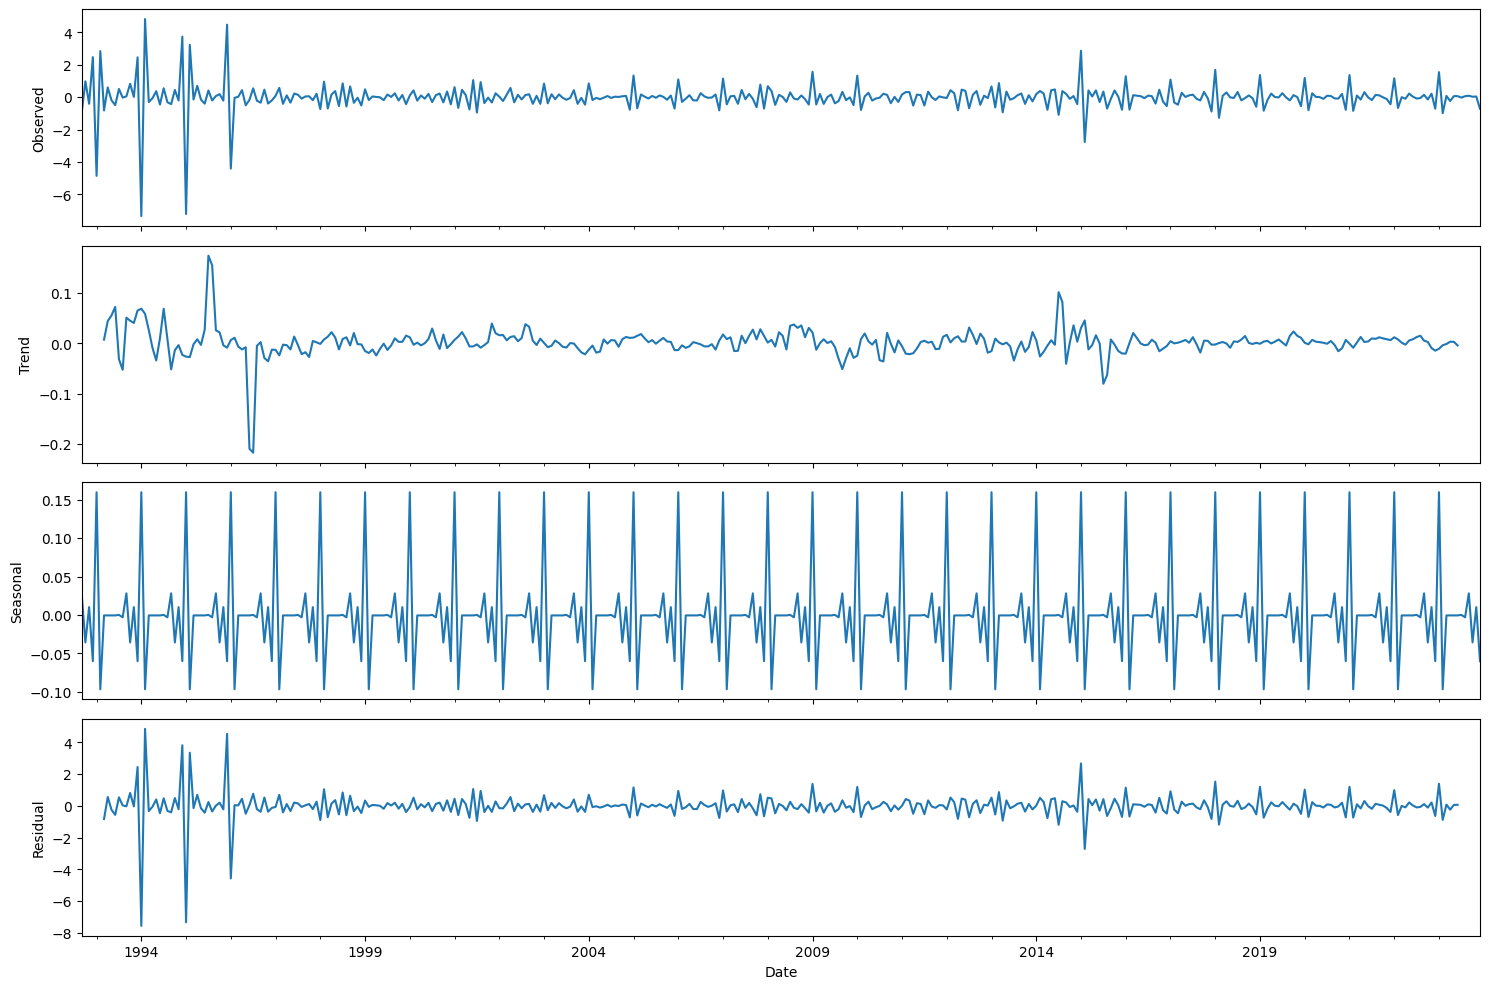

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm
from pathlib import Path
import os

# Get the root directory of the current project
project_dir = Path().resolve()

# Print the current working directory to confirm
print(f"Current working directory: {project_dir}")

# Read data
metadata = pd.read_csv(project_dir / "data_files" / "processed_data" / "meta_monthly_blocks.csv")
data = pd.read_csv(project_dir / "data_files" / "processed_data" / "em_imputed_stationary.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date').sort_index()

# Function to deseasonalize a single column
def deseasonalize(series):
    # Ensure the series has a datetime index
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    
    # Keep track of original NaN positions
    nan_mask = series.isna()
    
    # Interpolate NaNs temporarily for decomposition
    interpolated_series = series.interpolate().ffill().bfill()
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(interpolated_series, model='additive', period=12)
    
    # Combine trend and residual for deseasonalized series
    deseasonalized = decomposition.trend + decomposition.resid
    
    # Restore NaNs to their original positions
    deseasonalized[nan_mask] = np.nan
    
    return deseasonalized

# Function to standardize a single column
def z_score(x):
    return (x - x.mean()) / x.std()

# Normalize and deseasonalize the data
normalized_deseasonalized_data = data.copy()
for column in tqdm(normalized_deseasonalized_data.columns):
    if column != 'date':
        # Normalize
        normalized_series = z_score(normalized_deseasonalized_data[column])
        # Deseasonalize
        normalized_deseasonalized_data[column] = deseasonalize(normalized_series)

# Store the original data for later use if needed
original_data = data.copy()

# Use the deseasonalized data for further analysis
data = normalized_deseasonalized_data

# Check the first few rows of each series to ensure they're not all the same
print(data.head(10))

# Visualize the decomposition of a sample column
sample_column = data.columns[0]  # Change this to the column you want to visualize
decomposition = seasonal_decompose(data[sample_column].dropna(), model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Save the deseasonalized data for later use
data.to_csv(project_dir / "data_files" / "processed_data" / "deseasonalized_full_data.csv", index=False)


Alternative stl decomposition method for consideration (not adopted here due to erratic behavior; benefit: preserve length of the data because it doesnt use sliding window average)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm
import os
from pathlib import Path

# Get the root directory of the current project
project_dir = Path().resolve()

# Print the current working directory to confirm
print(f"Current working directory: {project_dir}")

# Read data
metadata = pd.read_csv(project_dir / "data_files" / "processed_data" / "meta_monthly_blocks.csv")
data = pd.read_csv(project_dir / "data_files" / "processed_data" / "em_imputed_mq_stationary.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date').sort_index()

# Function to deseasonalize a single column using STL
def deseasonalize(series):
    # Ensure the series has a datetime index
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    
    # Keep track of original NaN positions
    nan_mask = series.isna()
    
    # Drop NaN values
    clean_series = series.dropna()
    
    # Only proceed if we have enough data points
    if len(clean_series) > 2 * 12:  # Ensure at least 2 years of data
        # Perform STL decomposition
        stl = STL(clean_series, period=12, robust=True)
        result = stl.fit()
        
        # Combine trend and residual for deseasonalized series
        deseasonalized = result.trend + result.resid
        
        # Create a new series with the original index
        full_deseasonalized = pd.Series(index=series.index)
        
        # Fill in the deseasonalized values
        full_deseasonalized.loc[clean_series.index] = deseasonalized
        
        # Ensure NaNs are in their original positions
        full_deseasonalized[nan_mask] = np.nan
    else:
        # If not enough data, return the original series
        full_deseasonalized = series
    
    return full_deseasonalized

# Function to standardize a single column
def z_score(x):
    return (x - x.mean()) / x.std()

# Normalize and deseasonalize the data
normalized_deseasonalized_data = data.copy()
for column in tqdm(normalized_deseasonalized_data.columns):
    if column != 'date':
        # Normalize
        normalized_series = z_score(normalized_deseasonalized_data[column])
        # Deseasonalize
        normalized_deseasonalized_data[column] = deseasonalize(normalized_series)

# Store the original data for later use if needed
original_data = data.copy()

# Use the deseasonalized data for further analysis
data = normalized_deseasonalized_data

# Check the first few rows of each series to ensure they're not all the same
print(data.head(10))

# Save the deseasonalized data for later use
data.to_csv(project_dir / "data_files" / "processed_data" / "deseasonalized_data_stl.csv", index=False)